In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [221]:
plt.style.use('ggplot')

首先把测试集和训练集合并，进行数据观察。

In [222]:
train = pd.read_csv('titanic_data/train.csv')
test = pd.read_csv('titanic_data/test.csv')
full = pd.concat([train, test], ignore_index=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [223]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


## 数据清洗

In [224]:
full.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

'Age'、'Cabin'、'Embarked'、'Fare'有缺失值。

In [225]:
full.Embarked.mode()

0    S
dtype: object

'Embarked'众数为'S'，所以为我们用'S'填充缺失值。

In [226]:
full['Embarked'].fillna('S', inplace=True)

'Fare'和'Pclass'相关,所以查看缺失值对应的'Pclass'

In [227]:
full[full.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


'Pclass'为3，以'Pclass'为3所对应的'fare'的中位数填充缺失值

In [228]:
full.Fare.fillna(full[full.Pclass==3]['Fare'].median(), inplace=True)

In [229]:
full.Cabin[1:10]

1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

'Cabin'的缺失值很多，或许有'Cabin'和无'Cabin'生存的概率不同，画图分析一下。

In [230]:
full.loc[full.Cabin.notnull(), 'Cabin'] = 1
full.loc[full.Cabin.isnull(), 'Cabin'] = 0

In [231]:
full.Cabin.isnull().sum()

0

Text(0.5, 1.0, 'Survival Rate')

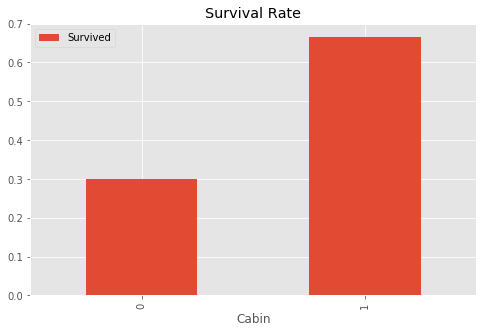

In [232]:
pd.pivot_table(full, index=['Cabin'], values=['Survived']).plot.bar(figsize=(8,5))
plt.title('Survival Rate')

In [233]:
cabin=pd.crosstab(full.Cabin,full.Survived)
cabin.rename(index={0:'no cabin',1:'cabin'},columns={0.0:'Dead',1.0:'Survived'},inplace=True)
cabin

Survived,Dead,Survived
Cabin,,
no cabin,481,206
cabin,68,136


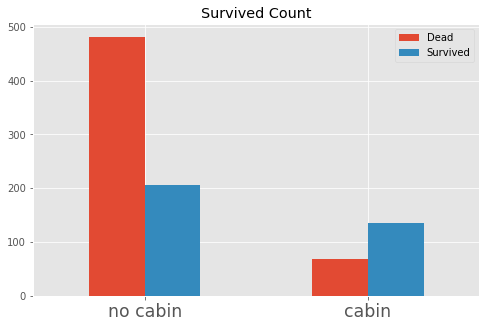

In [234]:
cabin.plot.bar(figsize=(8,5))
plt.xticks(rotation=0,size='xx-large')
plt.title('Survived Count')
plt.xlabel('')
plt.legend()

通过画图可以知道，拥有'Cabin'的人比没有的人，更容易活下来。

In [235]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,1,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,1,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [ ]:
下面，对'Name'进行分析,提取'Title'

In [236]:
full['Title'] = full['Name'].apply(lambda x:x.split(',')[1].split('.')[0].strip())

In [237]:
full.Title.head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [238]:
full.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Mlle              2
Major             2
Jonkheer          1
the Countess      1
Mme               1
Lady              1
Dona              1
Don               1
Sir               1
Capt              1
Name: Title, dtype: int64

In [239]:
pd.crosstab(full.Title, full.Sex)

Sex,female,male
Title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


In [240]:
full[(full['Title']=='Dr') & (full['Sex'] == 'female')]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
796,49.0,1,S,25.9292,"Leader, Dr. Alice (Farnham)",0,797,1,female,0,1.0,17465,Dr


In [205]:
nn={'Capt':'Rareman', 'Col':'Rareman','Don':'Rareman','Dona':'Rarewoman',
    'Dr':'Rareman','Jonkheer':'Rareman','Lady':'Rarewoman','Major':'Rareman',
    'Master':'Master','Miss':'Miss','Mlle':'Rarewoman','Mme':'Rarewoman',
    'Mr':'Mr','Mrs':'Mrs','Ms':'Rarewoman','Rev':'Mr','Sir':'Rareman',
    'the Countess':'Rarewoman'}

In [241]:
full.Title = full.Title.map(nn)

In [242]:
full.loc[full.PassengerId==797, 'Title'] = 'Rarewoman'

In [243]:
full.Title.value_counts()

Mr           765
Miss         260
Mrs          197
Master        61
Rareman       17
Rarewoman      9
Name: Title, dtype: int64

In [244]:
full[full.Title=='Master']['Sex'].value_counts()

male    61
Name: Sex, dtype: int64

In [245]:
full[full.Title=='Master']['Age'].describe()

count    53.000000
mean      5.482642
std       4.161554
min       0.330000
25%       2.000000
50%       4.000000
75%       9.000000
max      14.500000
Name: Age, dtype: float64

从上面可以看出，'Master'都是小男孩，所以我们希望将小女孩也找出来。

In [246]:
full[full.Title=='Miss']['Age'].describe()

count    210.000000
mean      21.774238
std       12.249077
min        0.170000
25%       15.000000
50%       22.000000
75%       30.000000
max       63.000000
Name: Age, dtype: float64

In [247]:
full.Age.fillna(999, inplace=True)

In [248]:
def filter_girl(person):
    if(person.Age != 999)  and  (person.Age <= 14) and (person.Title == 'Miss'):
        return 'Girl'
    if(person.Age == 999)  and  (person.Parch != 0) and (person.Title == 'Miss'):
        return 'Girl'
    return person.Title

In [249]:
full_backup = full
full['Title'] = full.apply(filter_girl, axis=1)

In [250]:
full.Title.value_counts()

Mr           765
Miss         201
Mrs          197
Master        61
Girl          59
Rareman       17
Rarewoman      9
Name: Title, dtype: int64

In [251]:
full[full['Age'] == 999]['Age'].value_counts()

999.0    263
Name: Age, dtype: int64

In [252]:
Tit=['Mr','Miss','Mrs','Master','Girl','Rareman','Rarewoman']
for i in Tit:
    full.loc[(full.Age==999)&(full.Title==i),'Age']=full.loc[full.Title==i,'Age'].median()

In [253]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          1309 non-null int64
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
dtypes: float64(3), int64(5), object(5)
memory usage: 133.1+ KB


最后，我们完成了缺失值的填充。

## 数据可视化

In [254]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,1,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,1,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


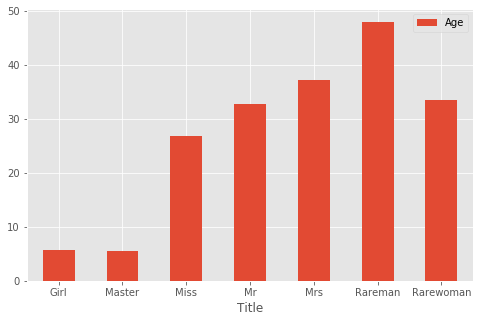

In [255]:
full.groupby(['Title'])[['Age','Title']].mean().plot(kind='bar',figsize=(8,5))
plt.xticks(rotation=0)
plt.show()

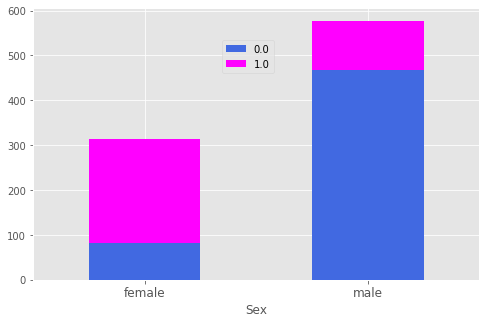

In [258]:
pd.crosstab(full.Sex,full.Survived).plot.bar(stacked=True,figsize=(8,5),color=['#4169E1','#FF00FF'])
plt.xticks(rotation=0,size='large')
plt.legend(bbox_to_anchor=(0.55,0.9))

可以看出女性比男性获救的概率高

In [259]:
agehist=pd.concat([full[full.Survived==1]['Age'],full[full.Survived==0]['Age']],axis=1)
agehist.columns=['Survived','Dead']
agehist.head()

,Survived,Dead
0,NaN,22.0
1,38.0,NaN
2,26.0,NaN
3,35.0,NaN
4,NaN,35.0


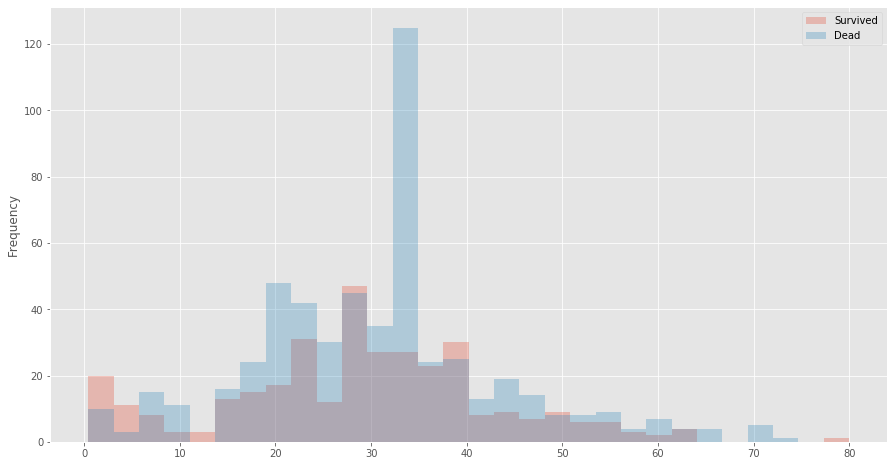

In [260]:
agehist.plot(kind='hist',bins=30,figsize=(15,8),alpha=0.3)

In [261]:
farehist=pd.concat([full[full.Survived==1]['Fare'],full[full.Survived==0]['Fare']],axis=1)
farehist.columns=['Survived','Dead']
farehist.head()

,Survived,Dead
0,NaN,7.25
1,71.2833,NaN
2,7.9250,NaN
3,53.1000,NaN
4,NaN,8.05


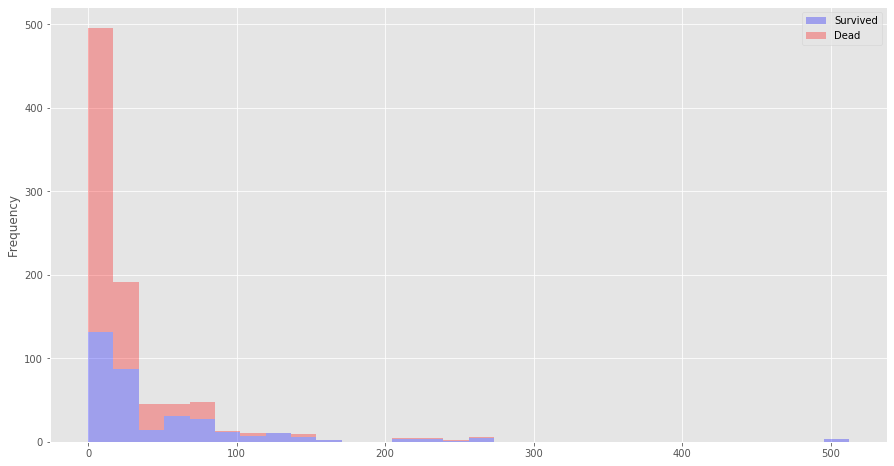

In [262]:
farehist.plot.hist(bins=30,figsize=(15,8),alpha=0.3,stacked=True,color=['blue','red'])

In [ ]:
可以看出，船票更贵的游客获救的概率更高。

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

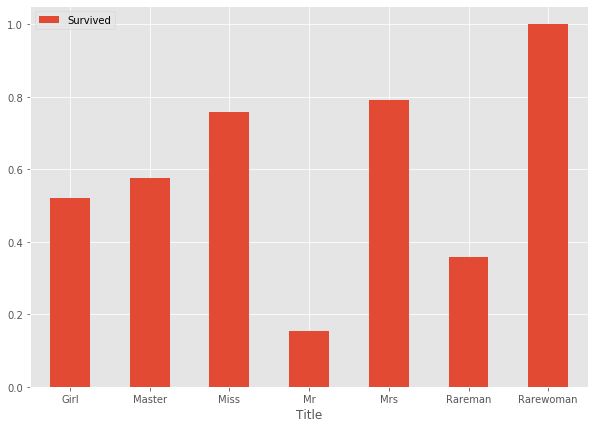

In [263]:
full.groupby(['Title'])[['Title','Survived']].mean().plot(kind='bar',figsize=(10,7))
plt.xticks(rotation=0)

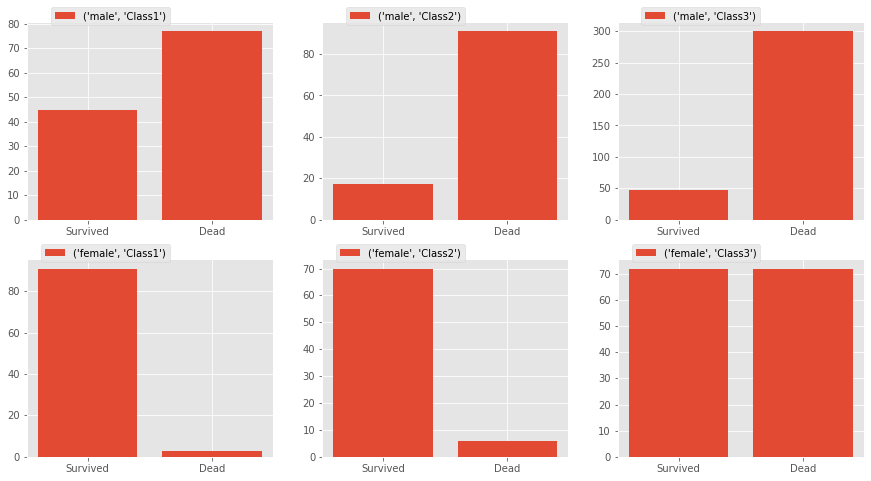

In [264]:
fig,axes=plt.subplots(2,3,figsize=(15,8))
Sex1=['male','female']
for i,ax in zip(Sex1,axes):
    for j,pp in zip(range(1,4),ax):
        PclassSex=full[(full.Sex==i)&(full.Pclass==j)]['Survived'].value_counts().sort_index(ascending=False)
        pp.bar(range(len(PclassSex)),PclassSex,label=(i,'Class'+str(j)))
        pp.set_xticks((0,1))
        pp.set_xticklabels(('Survived','Dead'))
        pp.legend(bbox_to_anchor=(0.6,1.1))

从上面可以看出，船票等级越高女性获救的概率越大。

## 特征工程

In [269]:
full.AgeCut = pd.cut(full.Age, 5)
full.FareCut = pd.qcut(full.Fare, 5)

In [270]:
full.AgeCut.value_counts().sort_index()

(0.0902, 16.136]    152
(16.136, 32.102]    564
(32.102, 48.068]    473
(48.068, 64.034]    107
(64.034, 80.0]       13
Name: Age, dtype: int64

In [271]:
full.FareCut.value_counts().sort_index()

(-0.001, 7.854]      275
(7.854, 10.5]        255
(10.5, 21.558]       255
(21.558, 41.579]     265
(41.579, 512.329]    259
Name: Fare, dtype: int64

In [274]:
full.loc[full.Age<=16.136,'AgeCut']=1
full.loc[(full.Age>16.136)&(full.Age<=32.102),'AgeCut']=2
full.loc[(full.Age>32.102)&(full.Age<=48.068),'AgeCut']=3
full.loc[(full.Age>48.068)&(full.Age<=64.034),'AgeCut']=4
full.loc[full.Age>64.034,'AgeCut']=5

In [275]:
full.loc[full.Fare<=7.854,'FareCut']=1
full.loc[(full.Fare>7.854)&(full.Fare<=10.5),'FareCut']=2
full.loc[(full.Fare>10.5)&(full.Fare<=21.558),'FareCut']=3
full.loc[(full.Fare>21.558)&(full.Fare<=41.579),'FareCut']=4
full.loc[full.Fare>41.579,'FareCut']=5

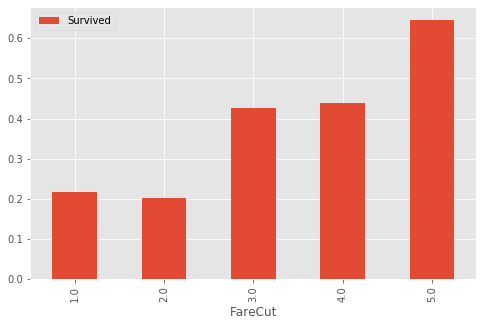

In [276]:
full[['FareCut','Survived']].groupby(['FareCut']).mean().plot.bar(figsize=(8,5))

In [277]:
full.corr()

,Age,Cabin,Fare,Parch,PassengerId,Pclass,SibSp,Survived,AgeCut,FareCut
Age,1.000000,0.257126,0.153051,-0.161843,0.026528,-0.361790,-0.259798,-0.077692,0.939760,0.129070
Cabin,0.257126,1.000000,0.507352,0.036806,-0.000208,-0.713857,-0.009064,0.316912,0.234979,0.535707
Fare,0.153051,0.507352,1.000000,0.221668,0.031029,-0.558740,0.160388,0.257307,0.135191,0.603698
Parch,-0.161843,0.036806,0.221668,1.000000,0.008942,0.018322,0.373587,0.081629,-0.159184,0.337256
PassengerId,0.026528,-0.000208,0.031029,0.008942,1.000000,-0.038354,-0.055224,-0.005007,0.017900,-0.003346
Pclass,-0.361790,-0.713857,-0.558740,0.018322,-0.038354,1.000000,0.060832,-0.338481,-0.328087,-0.720881
SibSp,-0.259798,-0.009064,0.160388,0.373587,-0.055224,0.060832,1.000000,-0.035322,-0.256077,0.351834
Survived,-0.077692,0.316912,0.257307,0.081629,-0.005007,-0.338481,-0.035322,1.000000,-0.103700,0.318206
AgeCut,0.939760,0.234979,0.135191,-0.159184,0.017900,-0.328087,-0.256077,-0.103700,1.000000,0.091607
FareCut,0.129070,0.535707,0.603698,0.337256,-0.003346,-0.720881,0.351834,0.318206,0.091607,1.000000


In [278]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,AgeCut,FareCut
0,22.0,0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,2.0,1.0
1,38.0,1,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,3.0,5.0
2,26.0,0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,2.0,2.0
3,35.0,1,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,3.0,5.0
4,35.0,0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,3.0,2.0


In [280]:
full[full.Survived.notnull()].pivot_table(index=['Title', 'Pclass'], values=['Survived']).sort_values('Survived', ascending=False)

Survived
Title     Pclass          
Rarewoman 2       1.000000
          1       1.000000
Master    1       1.000000
          2       1.000000
Girl      2       1.000000
Miss      1       0.977273
Mrs       1       0.976190
Miss      2       0.920000
Mrs       2       0.902439
Miss      3       0.552239
Mrs       3       0.500000
Girl      1       0.500000
Rareman   1       0.416667
Girl      3       0.400000
Master    3       0.392857
Mr        1       0.345794
          3       0.112853
          2       0.082474
Rareman   2       0.000000

In [281]:
full[full.Survived.notnull()].pivot_table(index=['Title','Parch'],values=['Survived']).sort_values('Survived',ascending=False)

Survived
Title     Parch          
Rarewoman 0      1.000000
Master    0      1.000000
Miss      1      0.875000
          2      0.857143
Mrs       0      0.855072
          1      0.812500
          2      0.769231
          3      0.750000
Girl      0      0.750000
Miss      0      0.736842
Girl      1      0.650000
Master    1      0.608696
          2      0.500000
Rareman   0      0.384615
Girl      2      0.363636
Mrs       5      0.250000
Mr        0      0.157447
          1      0.147059
          2      0.133333
          4      0.000000
          5      0.000000
Mrs       4      0.000000
          6      0.000000
Rareman   1      0.000000
Mr        3      0.000000

In [282]:
TPP=full[full.Survived.notnull()].pivot_table(index=['Title','Pclass','Parch'],values=['Survived']).sort_values('Survived',ascending=False)
TPP

Survived
Title     Pclass Parch          
Rarewoman 2      0      1.000000
Master    3      0      1.000000
Mrs       1      1      1.000000
          2      2      1.000000
                 3      1.000000
Miss      2      2      1.000000
                 1      1.000000
          1      2      1.000000
Mrs       1      0      1.000000
Miss      1      1      1.000000
Girl      2      1      1.000000
Master    2      2      1.000000
                 1      1.000000
          1      2      1.000000
Rarewoman 1      0      1.000000
Girl      2      2      1.000000
Miss      1      0      0.966667
Mrs       2      1      0.909091
Miss      2      0      0.904762
Mrs       2      0      0.869565
Girl      3      0      0.750000
Mrs       3      2      0.666667
                 0      0.611111
Miss      3      0      0.571429
Girl      3      1      0.533333
Mrs       1      2      0.500000
          3      3      0.500000
Girl      1      2      0.500000
Rareman   1      0      0.454545
Mrs       3      1      0.444444
Master    3      1      0.437500
Mr        1      2      0.400000
                 0      0.352273
Miss      3      2      0.333333
Mr        1      1      0.307692
Master    3      2      0.272727
Mrs       3      5      0.250000
Girl      3      2      0.187500
Mr        3      0      0.118644
          2      0      0.091954
          3      1      0.071429
          1      4      0.000000
Miss      3      1      0.000000
Mr        2      2      0.000000
          3      5      0.000000
Mrs       3      4      0.000000
Mr        3      4      0.000000
Mrs       3      6      0.000000
Mr        3      3      0.000000
Rareman   1      1      0.000000
          2      0      0.000000
Mr        3      2      0.000000
          2      1      0.000000

Text(34, 0.54, '50% survival rate')

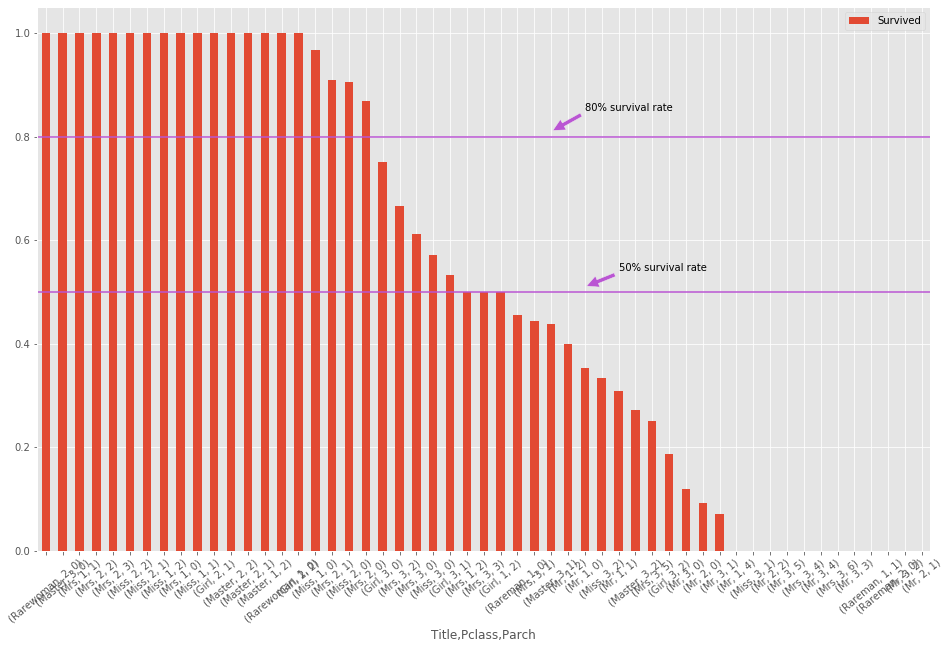

In [283]:
TPP.plot(kind='bar',figsize=(16,10))
plt.xticks(rotation=40)
plt.axhline(0.8,color='#BA55D3')
plt.axhline(0.5,color='#BA55D3')
plt.annotate('80% survival rate',xy=(30,0.81),xytext=(32,0.85),arrowprops=dict(facecolor='#BA55D3',shrink=0.05))
plt.annotate('50% survival rate',xy=(32,0.51),xytext=(34,0.54),arrowprops=dict(facecolor='#BA55D3',shrink=0.05))

In [297]:
full_backup = full.copy()

In [294]:
# use 'Title','Pclass','Parch' to generate feature 'TPP'.
Tit=['Girl','Master','Mr','Miss','Mrs','Rareman','Rarewoman']
for i in Tit:
    for j in range(1,4):
        for g in range(0,10):
            if full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g)&(full.Survived.notnull()),'Survived'].mean()>=0.8:
                full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g),'TPP']=1
            elif full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g)&(full.Survived.notnull()),'Survived'].mean()>=0.5:
                full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g),'TPP']=2
            elif full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g)&(full.Survived.notnull()),'Survived'].mean()>=0:
                full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g),'TPP']=3
            else: 
                full.loc[(full.Title==i)&(full.Pclass==j)&(full.Parch==g),'TPP']=4


In [295]:
full[full.TPP == 4]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,AgeCut,FareCut,TPP
915,48.0,1,C,262.375,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",3,916,1,female,1,NaN,PC 17608,Mrs,3.0,5.0,4.0
960,60.0,1,S,263.000,"Fortune, Mrs. Mark (Mary McDougald)",4,961,1,female,1,NaN,19950,Mrs,4.0,5.0,4.0
979,33.0,0,Q,7.750,"O'Donoghue, Ms. Bridget",0,980,3,female,0,NaN,364856,Rarewoman,3.0,1.0,4.0
1011,12.0,0,S,15.750,"Watt, Miss. Bertha J",0,1012,2,female,0,NaN,C.A. 33595,Girl,1.0,3.0,4.0
1030,40.0,0,S,46.900,"Goodwin, Mr. Charles Frederick",6,1031,3,male,1,NaN,CA 2144,Mr,3.0,5.0,4.0
1033,61.0,1,C,262.375,"Ryerson, Mr. Arthur Larned",3,1034,1,male,1,NaN,PC 17608,Mr,4.0,5.0,4.0
1233,34.5,0,S,69.550,"Sage, Mr. John George",9,1234,3,male,1,NaN,CA. 2343,Mr,3.0,5.0,4.0
1256,39.0,0,S,69.550,"Sage, Mrs. John (Annie Bullen)",9,1257,3,female,1,NaN,CA. 2343,Mrs,3.0,5.0,4.0


用'Sex'和'Pclass'为依据来填充TPP=4的行

In [300]:
full[full.Survived.notnull()].pivot_table(index=['Sex','Pclass'],values=['Survived']).sort_values('Survived',ascending=False)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [301]:
full.ix[(full.TPP==4)&(full.Sex=='female')&(full.Pclass!=3),'TPP']=1
full.ix[(full.TPP==4)&(full.Sex=='female')&(full.Pclass==3),'TPP']=2
full.ix[(full.TPP==4)&(full.Sex=='male'), 'TPP']=3

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package s

In [302]:
full.TPP.value_counts()

3.0    871
1.0    262
2.0    176
Name: TPP, dtype: int64

In [303]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1309 non-null float64
Cabin          1309 non-null int64
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
AgeCut         1309 non-null float64
FareCut        1309 non-null float64
TPP            1309 non-null float64
dtypes: float64(6), int64(5), object(5)
memory usage: 163.8+ KB


## 训练模型

In [307]:
predictors=['Cabin','Embarked','Parch','Pclass','Sex','SibSp','Title','AgeCut','TPP','FareCut','Age','Fare']
full_dummies=pd.get_dummies(full[predictors])

In [308]:
full_dummies.head()

,Cabin,Parch,Pclass,SibSp,AgeCut,TPP,FareCut,Age,Fare,Embarked_C,...,Embarked_S,Sex_female,Sex_male,Title_Girl,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rareman,Title_Rarewoman
0,0,0,3,1,2.0,3.0,1.0,22.0,7.2500,0,...,1,0,1,0,0,0,1,0,0,0
1,1,0,1,1,3.0,1.0,5.0,38.0,71.2833,1,...,0,1,0,0,0,0,0,1,0,0
2,0,0,3,0,2.0,2.0,2.0,26.0,7.9250,0,...,1,1,0,0,0,1,0,0,0,0
3,1,0,1,1,3.0,1.0,5.0,35.0,53.1000,0,...,1,1,0,0,0,0,0,1,0,0
4,0,0,3,0,3.0,3.0,2.0,35.0,8.0500,0,...,1,0,1,0,0,0,1,0,0,0


使用交叉验证法来训练模型，模型包括：
- KNN
- Logistic Regression
- Random Forest
- SVM
- Gradient Boosting Decision Tree

In [310]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [314]:
models = [KNeighborsClassifier(), LogisticRegression(), RandomForestClassifier(), 
         GradientBoostingClassifier(), SVC()]

In [322]:
full.Survived.isnull().value_counts()

False    891
True     418
Name: Survived, dtype: int64

In [323]:
X_train = full_dummies[: 891]
y_train = full.Survived[: 891]
X_test = full_dummies[891 :]

In [324]:
X_train.shape, y_train.shape, X_test.shape

((891, 21), (891,), (418, 21))

因为要使用KNN算法和SVM算法， 所以需要对数据进行标准化。

In [326]:
from sklearn.preprocessing import StandardScaler

In [327]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [334]:
names = ['KNN', 'LR', 'RF', 'GBDT', 'SVM']
for name, model in zip(names, models):
    score = cross_val_score(model, X_train, y_train, cv=5)
    print('{}:\nmean:{:.2f}\n{}\n'.format(name, score.mean(), score))

KNN:
mean:0.72
[0.67597765 0.69832402 0.73033708 0.7247191  0.75706215]

LR:
mean:0.83
[0.83798883 0.82681564 0.80337079 0.83707865 0.84745763]

RF:
mean:0.79
[0.82122905 0.78212291 0.7752809  0.76404494 0.82485876]



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GBDT:
mean:0.84
[0.8547486  0.80446927 0.86516854 0.80337079 0.88135593]

SVM:
mean:0.75
[0.72625698 0.73743017 0.75842697 0.73595506 0.79096045]



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

从上面可以看出，不对数据进行标准化，GBDT和Logistic Regression的表现最好。

In [335]:
names = ['KNN', 'LR', 'RF', 'GBDT', 'SVM']
print('Scaled:\n')
for name, model in zip(names, models):
    score = cross_val_score(model, X_train_scaled, y_train, cv=5)
    print('{}:\nmean:{:.2f}\n{}\n'.format(name, score.mean(), score))

Scaled:

KNN:
mean:0.81
[0.82122905 0.77653631 0.80337079 0.80898876 0.83615819]

LR:
mean:0.83
[0.82681564 0.81564246 0.8258427  0.83146067 0.86440678]

RF:
mean:0.81
[0.82681564 0.77653631 0.84269663 0.76966292 0.83615819]



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GBDT:
mean:0.84
[0.8547486  0.80446927 0.86516854 0.80337079 0.87570621]

SVM:
mean:0.83
[0.82681564 0.82681564 0.83146067 0.79775281 0.8700565 ]



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

可以看出对数据标准化，可以显著提升SVM和KNN的表现

现在，我们来看一下特征的重要性

In [348]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [349]:
model.feature_importances_

array([3.75796390e-02, 1.91089681e-03, 7.70069219e-03, 2.20201183e-02,
       6.02654970e-03, 6.40113949e-01, 5.43199179e-03, 8.50309893e-02,
       1.23752203e-01, 1.82856543e-03, 0.00000000e+00, 1.85555785e-02,
       5.15063123e-04, 3.11239142e-04, 9.96125674e-04, 1.09137064e-02,
       4.63331112e-04, 3.43650390e-02, 2.11558487e-03, 3.68736962e-04,
       0.00000000e+00])

In [350]:
X_train.columns

Index(['Cabin', 'Parch', 'Pclass', 'SibSp', 'AgeCut', 'TPP', 'FareCut', 'Age',
       'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female',
       'Sex_male', 'Title_Girl', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Rareman', 'Title_Rarewoman'],
      dtype='object')

In [352]:
fi = pd.DataFrame({'importance' : model.feature_importances_}, index=X_train.columns)

In [353]:
fi.sort_values('importance', ascending=False)

,importance
TPP,0.640114
Fare,0.123752
Age,0.085031
Cabin,0.037580
Title_Mr,0.034365
SibSp,0.022020
Embarked_S,0.018556
Title_Master,0.010914
Pclass,0.007701
AgeCut,0.006027


Text(0.5, 1.0, 'Feature Importance')

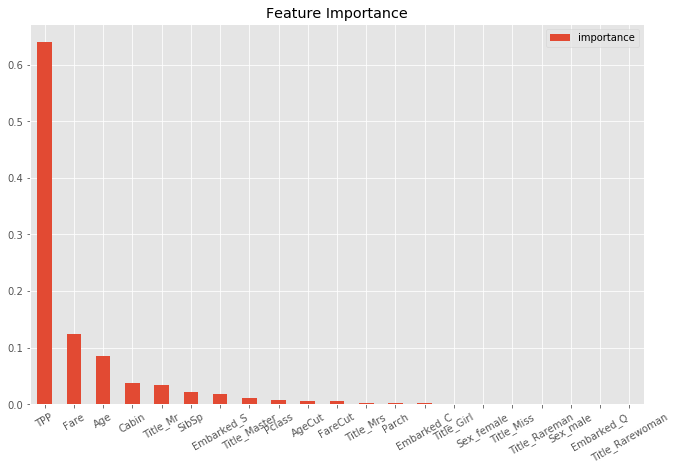

In [354]:
fi.sort_values('importance',ascending=False).plot.bar(figsize=(11,7))
plt.xticks(rotation=30)
plt.title('Feature Importance',size='x-large')

可以看出'TPP'、'Fare'和'Age'这三个特征最重要。

下面我们观察一下，那些分类错误的样本，看看其中是否有些规律，我们可以以此来构建一些新的特征。

In [356]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state=1)

In [357]:
kf.get_n_splits(X_train)

10

In [358]:
print(kf)

KFold(n_splits=10, random_state=1, shuffle=False)


In [361]:
rr = []
for train_index, val_index in kf.split(X_train):
    pred = model.fit(X_train.ix[train_index], y_train.ix[train_index]).predict(X_train.ix[val_index])
    rr.append(y_train[val_index][pred!=y_train[val_index]].index.values)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/panda

In [362]:
rr

[array([ 2, 14, 17, 18, 21, 23, 25, 30, 36, 38, 40, 41, 49, 55, 68, 74, 79,
        81, 85], dtype=int64),
 array([106, 107, 111, 114, 127, 137, 139, 140, 141, 142, 146, 165, 169,
        177], dtype=int64),
 array([184, 187, 199, 204, 205, 207, 209, 220, 224, 226, 233, 235, 240,
        246, 248, 251, 261, 264, 267], dtype=int64),
 array([271, 273, 279, 283, 286, 288, 297, 301, 312, 315, 328, 330, 338,
        347, 351], dtype=int64),
 array([357, 361, 390, 391, 396, 400, 414, 415, 429, 431, 444], dtype=int64),
 array([447, 449, 452, 453, 455, 460, 483, 489, 501, 502, 505, 507, 509,
        510, 534], dtype=int64),
 array([543, 547, 550, 553, 554, 569, 570, 578, 579, 587, 604, 607, 617,
        621, 622], dtype=int64),
 array([630, 632, 643, 645, 647, 649, 654, 659, 660, 664, 673, 677, 680,
        692, 698, 711, 712], dtype=int64),
 array([729, 744, 748, 762, 767, 772, 782], dtype=int64),
 array([804, 807, 816, 821, 828, 839, 852, 854, 855, 857], dtype=int64)]

In [363]:
whole_index = np.concatenate(rr)
len(whole_index)

142

In [364]:
full.ix[whole_index].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,AgeCut,FareCut,TPP
2,26.0,0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,2.0,2.0,2.0
14,14.0,0,S,7.8542,"Vestrom, Miss. Hulda Amanda Adolfina",0,15,3,female,0,0.0,350406,Girl,1.0,2.0,2.0
17,34.5,0,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,1.0,244373,Mr,3.0,3.0,3.0
18,31.0,0,S,18.0000,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",0,19,3,female,1,0.0,345763,Mrs,2.0,3.0,2.0
21,34.0,1,S,13.0000,"Beesley, Mr. Lawrence",0,22,2,male,0,1.0,248698,Mr,3.0,3.0,3.0


In [365]:
diff = full.ix[whole_index]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [366]:
diff.describe()

,Age,Cabin,Fare,Parch,PassengerId,Pclass,SibSp,Survived,AgeCut,FareCut,TPP
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,30.767606,0.260563,25.818838,0.267606,402.225352,2.345070,0.429577,0.647887,2.422535,2.950704,2.605634
std,12.666853,0.440496,28.246596,0.693593,249.259966,0.883624,0.775492,0.479320,0.783916,1.333302,0.582946
min,2.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,23.250000,0.000000,7.925000,0.000000,201.250000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000
50%,30.000000,0.000000,14.852050,0.000000,394.500000,3.000000,0.000000,1.000000,2.000000,3.000000,3.000000
75%,37.000000,1.000000,29.700000,0.000000,621.000000,3.000000,1.000000,1.000000,3.000000,4.000000,3.000000
max,80.000000,1.000000,151.550000,5.000000,858.000000,3.000000,4.000000,1.000000,5.000000,5.000000,3.000000


In [367]:
# include，这个参数默认是只计算数值型特征的统计量，
# 当输入include=['O']，会计算离散型变量的统计特征
diff.describe(include=['O'])

,Embarked,Name,Sex,Ticket,Title
count,142,142,142,142,142
unique,3,142,2,130,6
top,S,"Abbott, Mrs. Stanton (Rosa Hunt)",male,1601,Mr
freq,101,1,85,5,77


In [368]:
diff.groupby(['Title'])['Survived'].agg([('average','mean'),('number','count')])

,average,number
Title,,
Girl,0.333333,6
Master,1.000000,3
Miss,0.333333,30
Mr,0.831169,77
Mrs,0.428571,21
Rareman,0.800000,5


In [369]:
diff.groupby(['Title','Pclass'])['Survived'].agg([('average','mean'),('number','count')])

average  number
Title   Pclass                  
Girl    1       0.000000       1
        3       0.400000       5
Master  3       1.000000       3
Miss    1       0.000000       1
        2       0.000000       2
        3       0.370370      27
Mr      1       0.656250      32
        2       0.888889       9
        3       0.972222      36
Mrs     2       0.000000       4
        3       0.529412      17
Rareman 1       0.800000       5

看起来，Pclass=3的Miss/Mrs和Pclass=1/3的Mr分类出错的概率很大。

In [370]:
diff.groupby(['Title','Pclass','Parch','SibSp'])['Survived'].agg([('average','mean'),('number','count')])

average  number
Title   Pclass Parch SibSp                  
Girl    1      2     1      0.000000       1
        3      0     0      0.000000       1
               1     0      0.000000       1
                     1      0.000000       1
               2     0      1.000000       1
                     4      1.000000       1
Master  3      1     1      1.000000       1
               2     0      1.000000       1
                     4      1.000000       1
Miss    1      0     0      0.000000       1
        2      0     0      0.000000       2
        3      0     0      0.380952      21
                     1      0.000000       3
                     2      0.500000       2
               2     4      1.000000       1
Mr      1      0     0      0.705882      17
                     1      0.625000       8
               1     0      0.000000       1
                     1      0.666667       3
               2     0      0.500000       2
                     1      1.000000       1
        2      0     0      1.000000       7
                     1      0.500000       2
        3      0     0      0.968750      32
                     1      1.000000       2
                     2      1.000000       1
               1     1      1.000000       1
Mrs     2      0     0      0.000000       1
                     1      0.000000       2
               1     1      0.000000       1
        3      0     0      0.500000       2
                     1      0.375000       8
                     3      1.000000       1
               1     0      1.000000       1
                     1      0.666667       3
               2     0      0.000000       1
               5     1      1.000000       1
Rareman 1      0     0      0.750000       4
                     2      1.000000       1

我们重点关注那些错误分类数目多的样本，就是：
- 'Mr','Pclass 1','Parch 0','SibSp 0\1', 17+8
- 'Mr','Pclass 2\3','Parch 0','SibSp 0', 32+7
- 'Miss','Pclass 3','Parch 0','SibSp 0', 21

In [371]:
full.loc[(full.Title=='Mr')&(full.Pclass==1)&(full.Parch==0)&((full.SibSp==0)|(full.SibSp==1)),'MPPS']=1
full.loc[(full.Title=='Mr')&(full.Pclass!=1)&(full.Parch==0)&(full.SibSp==0),'MPPS']=2
full.loc[(full.Title=='Miss')&(full.Pclass==3)&(full.Parch==0)&(full.SibSp==0),'MPPS']=3
full.MPPS.fillna(4,inplace=True)

In [372]:
full.MPPS.value_counts()

4.0    606
2.0    485
1.0    132
3.0     86
Name: MPPS, dtype: int64

通过前面的特征重要性，我们发现'Fare'很重要，我们看看能不能通过这个构造一些新特征

In [374]:
diff[(diff.Title=='Mr')|(diff.Title=='Miss')].groupby(['Title','Survived','Pclass'])[['Fare']].describe().unstack()

Fare                                                         \
               count                  mean                              std   
Pclass             1    2     3          1          2          3          1   
Title Survived                                                                
Miss  0.0        1.0  2.0  17.0  28.712500  13.000000   9.564712        NaN   
      1.0        NaN  NaN  10.0        NaN        NaN   9.999590        NaN   
Mr    0.0       11.0  1.0   1.0  60.678027  27.720800  56.495800  35.887886   
      1.0       21.0  8.0  35.0  51.167862  14.107812  14.217260  30.466921   

                                              ...                              \
                                         min  ...       25%      50%            
Pclass                 2          3        1  ...         3        1        2   
Title Survived                                ...                               
Miss  0.0       0.000000   3.410307  28.7125  ...   7.75000  28.7125  13.0000   
      1.0            NaN   4.904273      NaN  ...   7.75625      NaN      NaN   
Mr    0.0            NaN        NaN  26.5500  ...  56.49580  53.1000  27.7208   
      1.0       4.963091  15.845064  26.5500  ...   7.77500  35.5000  13.0000   

                                                                           \
                             75%                             max            
Pclass                3        1          2          3         1        2   
Title Survived                                                              
Miss  0.0        7.8542  28.7125  13.000000   8.662500   28.7125  13.0000   
      1.0        7.8896      NaN        NaN   9.362525       NaN      NaN   
Mr    0.0       56.4958  94.0500  27.720800  56.495800  113.2750  27.7208   
      1.0        7.9250  76.7292  13.215625   9.081250  120.0000  26.0000   

                         
                         
Pclass                3  
Title Survived           
Miss  0.0       18.0000  
      1.0       23.2500  
Mr    0.0       56.4958  
      1.0       56.4958  

[4 rows x 24 columns]

In [375]:
full[(full.Title=='Mr')|(full.Title=='Miss')].groupby(['Title','Survived','Pclass'])[['Fare']].describe().unstack()

Fare                                                 \
               count                     mean                         
Pclass             1     2      3           1          2          3   
Title Survived                                                        
Miss  0.0        1.0   2.0   30.0   28.712500  13.000000  11.637643   
      1.0       43.0  23.0   37.0  126.099126  17.611230   9.216559   
Mr    0.0       70.0  89.0  283.0   65.164104  19.651638  10.779237   
      1.0       37.0   8.0   36.0   73.464646  14.107812  15.391664   

                                                           ...          \
                       std                            min  ...     25%   
Pclass                   1          2          3        1  ...       3   
Title Survived                                             ...           
Miss  0.0              NaN   0.000000   8.512399  28.7125  ...  7.7750   
      1.0        92.270616  12.193091   4.004733  26.2833  ...  7.7500   
Mr    0.0        61.918723  15.857649   9.170363   0.0000  ...  7.7333   
      1.0       109.590302   4.963091  17.133150  26.2875  ...  7.7750   

                                                                       \
                    50%                       75%                       
Pclass                1     2       3           1          2        3   
Title Survived                                                          
Miss  0.0       28.7125  13.0  8.4000   28.712500  13.000000  10.3469   
      1.0       90.0000  13.0  7.7750  152.506250  17.429150   7.9250   
Mr    0.0       48.3021  13.0  7.8958   78.459375  26.000000   8.6625   
      1.0       35.5000  13.0  7.9250   76.729200  13.215625   9.5000   

                                         
                     max                 
Pclass                 1     2        3  
Title Survived                           
Miss  0.0        28.7125  13.0  46.9000  
      1.0       512.3292  65.0  24.1500  
Mr    0.0       263.0000  73.5  69.5500  
      1.0       512.3292  26.0  56.4958  

[4 rows x 24 columns]

分类错误的数据和全部数据看起来没什么不同，最后，我们可以画一下相关系数的热图

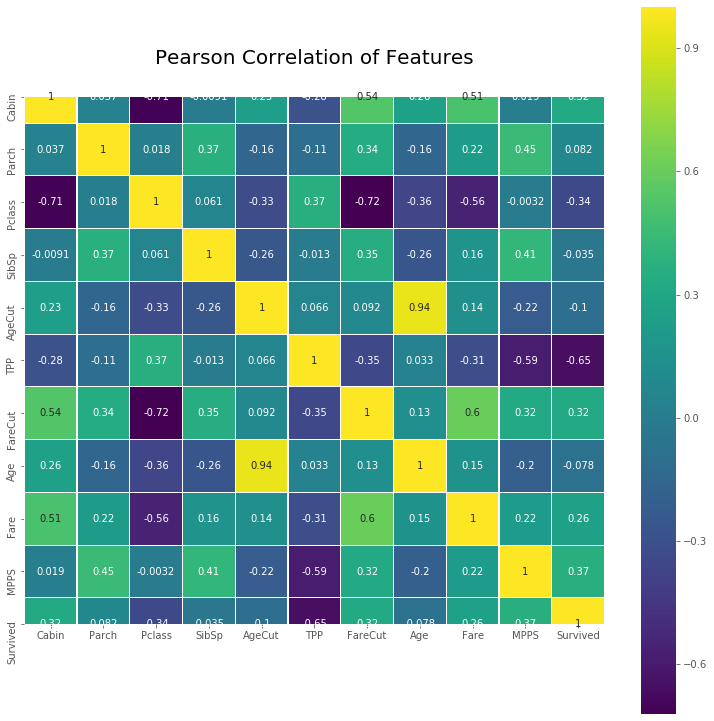

In [378]:
colormap = plt.cm.viridis
plt.figure(figsize=(13,13))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(full[['Cabin','Parch','Pclass','SibSp','AgeCut','TPP','FareCut','Age','Fare','MPPS','Survived']].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

## 参数调节

下面，我们利用网格搜索来查找表现最好的模型和相应的参数。

In [379]:
predictors=['Cabin','Embarked','Parch','Pclass','Sex','SibSp','Title','AgeCut','TPP','FareCut','Age','Fare','MPPS']
full_dummies=pd.get_dummies(full[predictors])

In [380]:
X_train=full_dummies[:891]
y_train=full.Survived[:891]
X_test=full_dummies[891:]

In [381]:
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [388]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [389]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])
param_grid = [{'classifier' : [KNeighborsClassifier()], 'preprocessing' : [None], 'classifier__n_neighbors' : [1,2,3,4,5,6,7,8,9]},
             {'classifier' : [LogisticRegression()], 'preprocessing' : [None], 'classifier__C' : [0.001, 0.01, 0.1, 1, 10]},
             {'classifier' : [SVC()], 'preprocessing' : [None], 'classifier__gamma' : [0.001, 0.01, 0.1, 1, 10], 'classifier__C' : [0.001, 0.01, 0.1, 1, 10]},
             {'classifier' : [GradientBoostingClassifier()], 'preprocessing' : [None], 'classifier__n_estimators' : [30,50,80,120,200], 
              'classifier__learning_rate' : [0.05,0.1,0.5,1], 'classifier__max_depth' : [1,2,3,4,5]}]

In [390]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)

In [391]:
grid.fit(X_train_scaled, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('classifier',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=Non...
                                                                    n_iter_no_change=None,

In [392]:
grid.best_params_

{'classifier': GradientBoostingClassifier(criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='deviance', max_depth=4,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=120,
                            n_iter_no_change=None, presort='auto',
                            random_state=None, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 'classifier__learning_rate': 0.1,
 'classifier__max_depth': 4,
 'classifier__n_estimators': 120,
 'preprocessing': None}

In [393]:
grid.best_score_

0.8484848484848485

现在我们找到了表现最好的模型和对应参数，GradientBoostingClassifier，下面我们来对测试集进行预测。

In [394]:
y_predict = grid.predict(X_test_scaled)

In [395]:
y_predict

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [444]:
result = pd.DataFrame({'PassengerId' : test.PassengerId, 'Survived' : y_predict})
result.to_csv('data/result.csv', index=False)